# RAT 6.3  

We will use the data in `https://s3-us-west-2.amazonaws.com/dsci/6002/data/homer.csv`.  

1) Fit a multiple regression model to predict $y$.  

In [21]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
homer = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/homer.csv')

In [5]:
homer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 7 columns):
y     6054 non-null float64
x1    6057 non-null float64
x2    6057 non-null float64
x3    6057 non-null float64
x4    6057 non-null float64
x5    6057 non-null float64
x6    6057 non-null float64
dtypes: float64(7)
memory usage: 331.3 KB


In [7]:
homer = homer.dropna()

In [8]:
homer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6054 entries, 0 to 6056
Data columns (total 7 columns):
y     6054 non-null float64
x1    6054 non-null float64
x2    6054 non-null float64
x3    6054 non-null float64
x4    6054 non-null float64
x5    6054 non-null float64
x6    6054 non-null float64
dtypes: float64(7)
memory usage: 378.4 KB


In [9]:
homer.head()

,y,x1,x2,x3,x4,x5,x6
0,-2.17360,-0.023816,-0.012885,0.045936,-0.182890,0.028694,-0.81119
1,-1.29570,0.018453,0.058999,-0.072399,0.008679,-0.084344,-0.24208
2,0.14539,0.054999,0.131770,-0.067223,0.202430,0.127060,0.63388
3,0.92959,-0.018933,-0.010875,-0.028255,0.017912,0.084330,0.66062
4,0.90259,-0.000877,0.066941,-0.048190,0.064742,0.147880,0.26643


In [31]:
sns.lmplot(x=['x1','x2','x3','x4','x5','x6'],y=['y'],data=homer)

TypeError: unhashable type: 'list'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e3f9320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f9fd5f8>]], dtype=object)

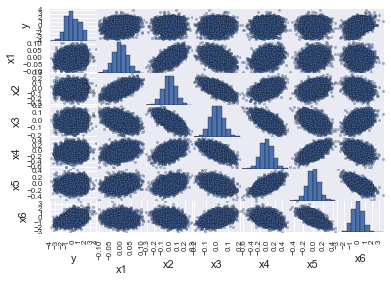

In [27]:
pd.scatter_matrix(homer)

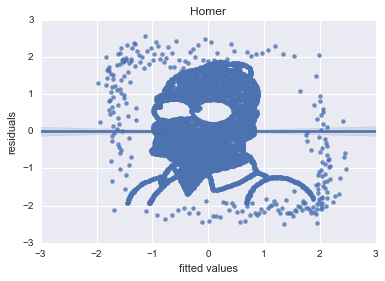

In [37]:
sns.regplot(results.fittedvalues,results.resid)
plt.title('Homer')
plt.ylabel('residuals')
plt.xlabel('fitted values')

In [25]:
X1 = homer[['x1','x2','x3','x4','x5','x6']]
X1 = sm.add_constant(X1)
y1 = homer['y']

model = sm.OLS(y1,X1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     452.1
Date:                Thu, 06 Oct 2016   Prob (F-statistic):               0.00
Time:                        13:45:56   Log-Likelihood:                -8583.7
No. Observations:                6054   AIC:                         1.718e+04
Df Residuals:                    6047   BIC:                         1.723e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0069      0.013     -0.534      0.593        -0.032     0.018
x1             4.0686      0.508      8.015      0.000         3.073     5.064
x2             1.1412      0.257      4.442      0.000         0.638     1.645
x3             4.0318      0.358     11.249      0.000         3.329     4.734
x4             0.9373      0.127      7.362      0.000         0.688     1.187
x5             3.9840      0.171     23.316      0.000         3.649     4.319
x6             0.9967      0.022     44.744      0.000         0.953     1.040
==============================================================================
Omnibus:                      635.831   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.770
Skew:                           0.070   Prob(JB):                     7.54e-41
Kurtosis:                       2.156   Cond. No.                         41.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Our equation is $y = -.0069 + 4.068*x1 + 1.14 * x2 + 4.03 *x3 + .937 * x4 +3.9 * x5 + .9967 * x6

2) Comment on the fit.  

>Our R^2 value is .31 which means that 31% of the variance in our model can be explained by our independent variables. In addition, our adjusted R^2 is about 30% (so the additional variables are adding explanatory power to our model). In addition, all of the model parameters have t-values that are significant with p-value less than .05.

3) Interpret the slope coefficient of $x_1$.  

> The slope coefficient of X1 says that for every increase in x1 , y will increase by 4.068.

4) Is the model useful for predicting $y$? Why or why not?

> This model seems somewhat useful for predicting y. We can explain ~31% of the variance in y using this model. In addition, the probability of our F-statistic is below .05, which means that the coefficients of our independent variables are significant. 

>However, if we look at the residual plot, we can see that the residuals are a picture of Homer! Therefore, this model is probably not useful for predicting y.
